# 16 – Seaborn Themes & Dashboard Project
**Author:** Hamna Munir  
**Repository:** Python-Libraries-for-AI-ML  
**Topic:** Seaborn Themes, Dashboard Layout, KPIs, Subplots Grid

---
##  Goal
Build a mini analytical dashboard using Seaborn + Matplotlib:
- Apply multiple `seaborn` themes
- Create KPI cards using text
- Subplots grid dashboard
- Combine charts + summary insights in one layout
- Professional clean visualization


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

---
## 1. Apply Seaborn Themes
Seaborn provides 5 built-in themes:
- `darkgrid`
- `whitegrid`
- `dark`
- `white`
- `ticks`

We will preview a theme example below.

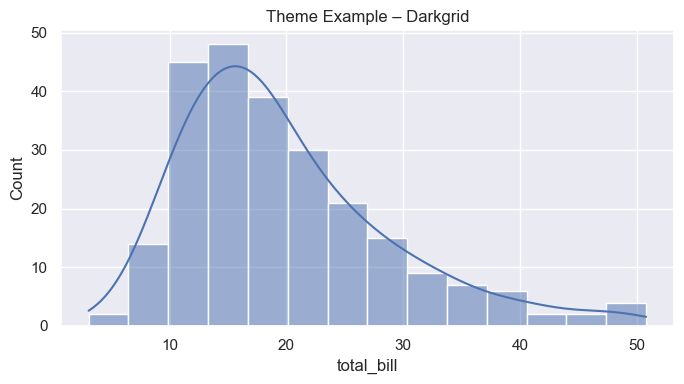

In [2]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7,4))
sns.histplot(tips['total_bill'], kde=True)
plt.title("Theme Example – Darkgrid")
plt.tight_layout()

---
## 2. KPI Cards – Text Based Dashboard Boxes
We create small KPI cards at the top of the dashboard.

In [3]:
avg_bill = tips['total_bill'].mean()
avg_tip = tips['tip'].mean()
tip_percent = (tips['tip'].sum() / tips['total_bill'].sum()) * 100
count_customers = len(tips)

kpi_data = {
    'Average Bill': f"${avg_bill:.2f}",
    'Average Tip': f"${avg_tip:.2f}",
    'Tip % of Revenue': f"{tip_percent:.1f}%",
    'Total Customers': count_customers
}

kpi_data

{'Average Bill': '$19.79',
 'Average Tip': '$3.00',
 'Tip % of Revenue': '15.2%',
 'Total Customers': 244}

---
## 3. Dashboard Layout Using GridSpec
We create a **2×2 dashboard layout**:
- Heatmap (correlation)
- Boxplot (tip distribution)
- Bar chart (total bill per day)
- Scatter plot (bill vs tip)

All charts use seaborn styling and a consistent theme.

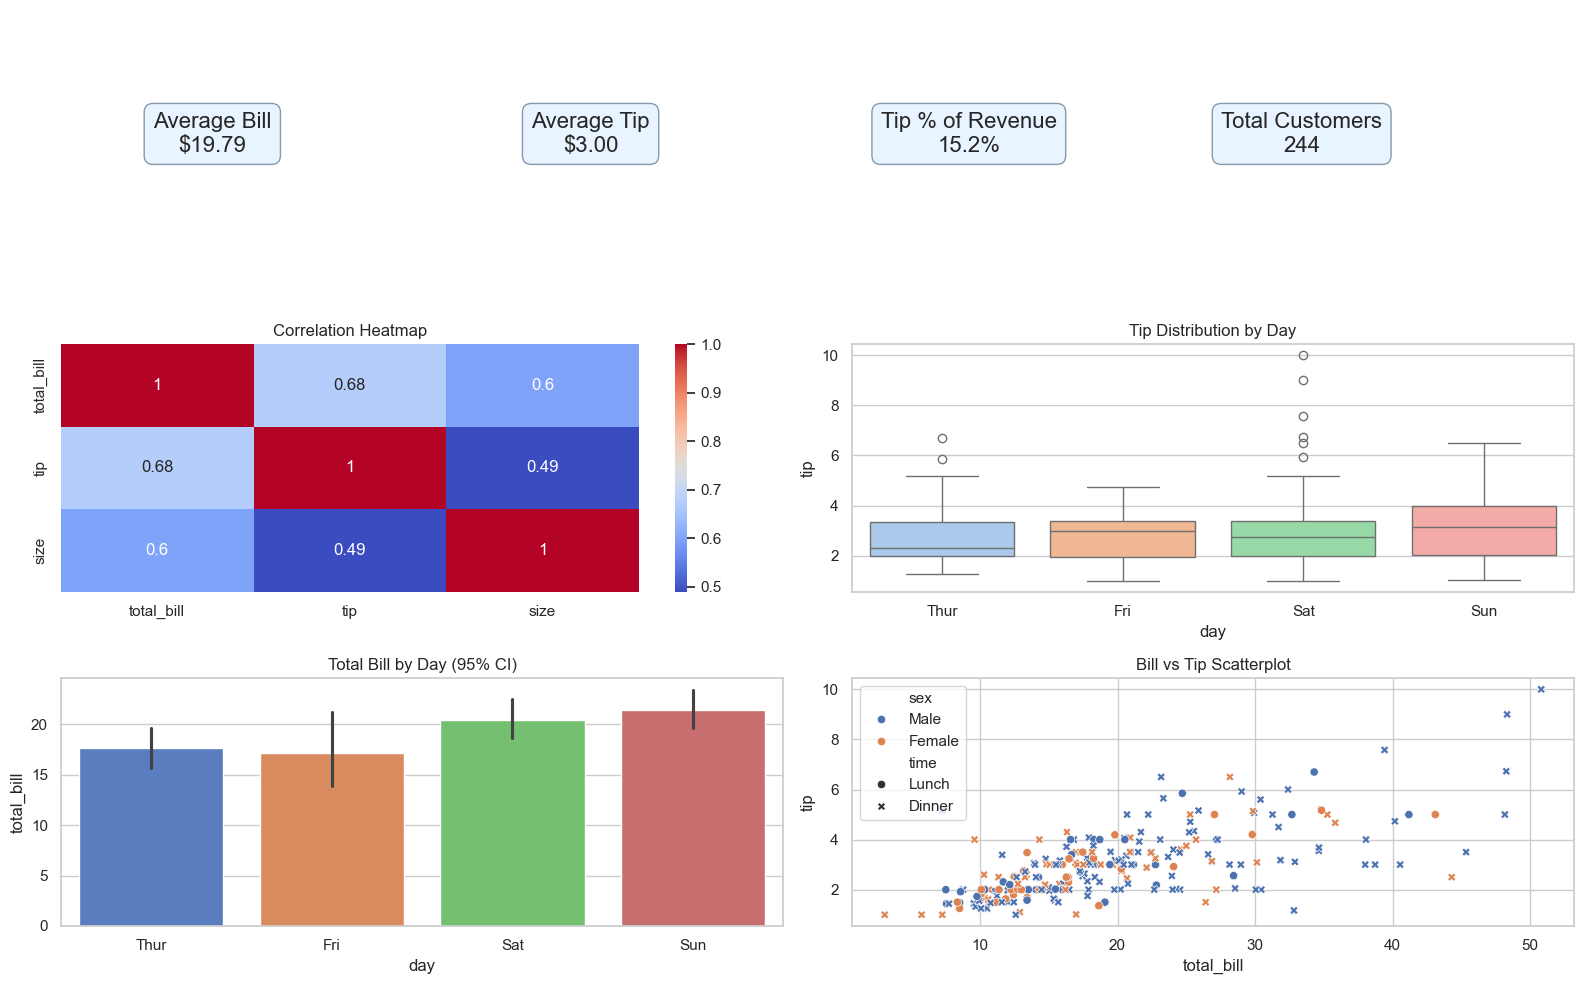

In [6]:
sns.set_theme(style="whitegrid")  # clean theme

fig = plt.figure(figsize=(16,10))
gs = GridSpec(3, 4, figure=fig)

# -------- KPI BAR -------- #
ax_kpi = fig.add_subplot(gs[0, :])
ax_kpi.axis('off')

x_pos = [0.1, 0.35, 0.60, 0.82]
for (label, value), x in zip(kpi_data.items(), x_pos):
    ax_kpi.text(x, 0.5, f"{label}\n{value}", fontsize=16,
                ha='center', va='center', transform=ax_kpi.transAxes,
                bbox=dict(boxstyle="round,pad=0.4", fc="#e8f4ff", ec="#89a", lw=1))

# -------- PLOT 1: Correlation Heatmap -------- #
ax1 = fig.add_subplot(gs[1, 0:2])
sns.heatmap(tips.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=ax1)
ax1.set_title("Correlation Heatmap")

# -------- PLOT 2: Boxplot (fixed palette warning) -------- #
ax2 = fig.add_subplot(gs[1, 2:4])
sns.boxplot(data=tips, y='tip', x='day', hue='day', legend=False,
            palette="pastel", ax=ax2)
ax2.set_title("Tip Distribution by Day")

# -------- PLOT 3: Barplot (fixed palette warning) -------- #
ax3 = fig.add_subplot(gs[2, 0:2])
sns.barplot(data=tips, x="day", y="total_bill", hue="day", legend=False,
            errorbar=('ci', 95), palette="muted", ax=ax3)
ax3.set_title("Total Bill by Day (95% CI)")

# -------- PLOT 4: Scatter Plot -------- #
ax4 = fig.add_subplot(gs[2, 2:4])
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", style="time", ax=ax4)
ax4.set_title("Bill vs Tip Scatterplot")

plt.tight_layout()
plt.show()


---
## 4. Summary Insights
- **Correlation:** `total_bill` strongly correlates with `tip`.
- **Boxplot:** Friday & Saturday show higher tip variation.
- **Daily revenue:** Saturday generates the **highest bill amount**.
- **Scatter:** Male customers tend to leave slightly higher bills.

This completes a clean, professional seaborn dashboard design.
